In [9]:
import pandas as pd

# Load the data
df = pd.read_csv('netflix_titles.csv')


In [10]:
# Check if the file was opened successfully
print(df.head(3))

  show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                

In [11]:
# Just to see how many nulls there are
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [12]:
# 1. Fill 'Unknown' in the Director and Cast columns
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# 2. Fill the most frequent country (USA) in the Country column
df['country'] = df['country'].fillna(df['country'].mode()[0])

print("Cleaning Done!")

Cleaning Done!


## Correcting the date

In [13]:
# Remove leading and trailing spaces from the date column
df['date_added'] = df['date_added'].str.strip()

# Convert the text to date format
df['date_added'] = pd.to_datetime(df['date_added'])

# Create a new column for the 'Year' only
df['year_added'] = df['date_added'].dt.year

print("Date is Fixed!")

Date is Fixed!


## Remove the remaining few noodles.

In [14]:
# Remove any remaining null values
df.dropna(inplace=True)

# Final check - everything should be zero
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64


## The biggest question: Are there more movies or TV shows?

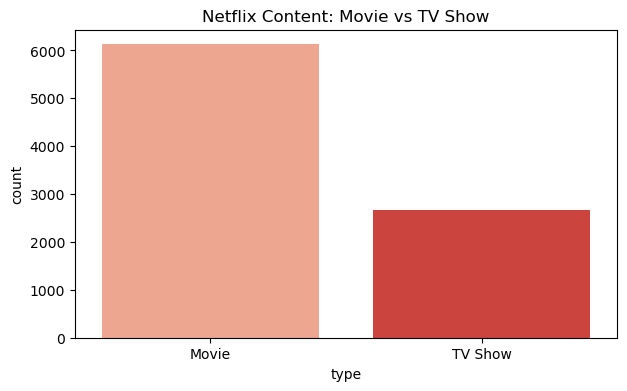

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Chart: Type of Content
plt.figure(figsize=(7,4))
sns.countplot(x='type', data=df, palette='Reds')
plt.title('Netflix Content: Movie vs TV Show')
plt.show()

## Top 10 Countries (Netflix ka Market)

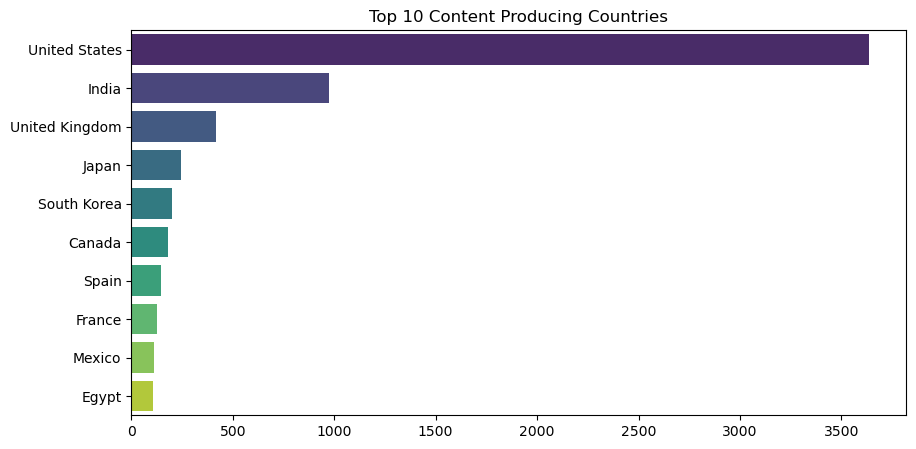

In [16]:
# 1. First remove top 10 countries
top_10 = df['country'].value_counts().head(10)

# 2. Make a chart
plt.figure(figsize=(10,5))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title('Top 10 Content Producing Countries')
plt.show()

## When was the content added? (Trend analysis)

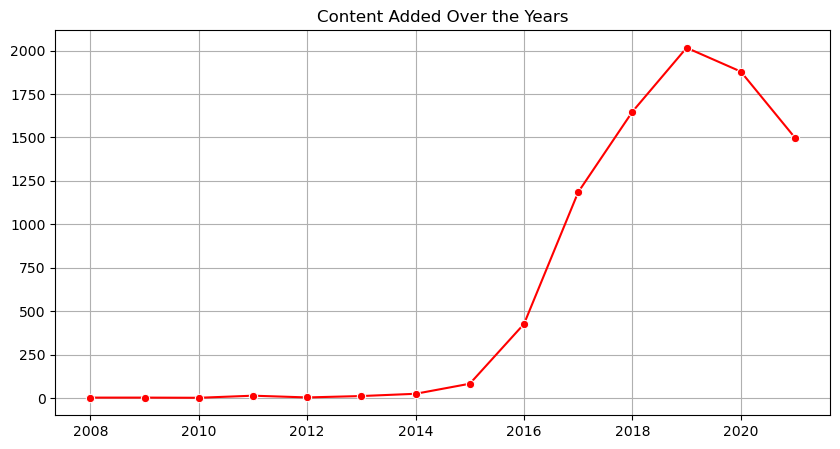

In [17]:
# counting by year
content_by_year = df['year_added'].value_counts().sort_index()

# Line chart is created
plt.figure(figsize=(10,5))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o', color='red')
plt.title('Content Added Over the Years')
plt.grid(True) # This will show lines in the graph that look professional
plt.show()

## Ratings Analysis (Target Audience)

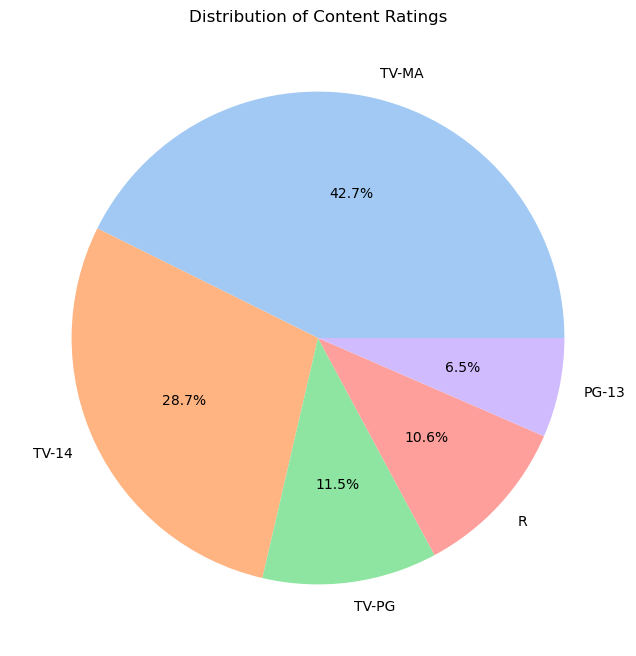

In [18]:
# Count based on ratings
top_ratings = df['rating'].value_counts().head(5)

# Create a Pie Chart (This looks great in a portfolio)
plt.figure(figsize=(8,8))
plt.pie(top_ratings.values, labels=top_ratings.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Content Ratings')
plt.show()

Insight: If TV-MA is the most common rating, it means Netflix is ​​primarily targeting an "adult audience."

In [19]:
# Save the cleaned data into a new CSV file
df.to_csv('netflix_cleaned_data.csv', index=False)
print("Project Data Saved Successfully!")

Project Data Saved Successfully!
